In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#Importing data
df= pd.read_csv(r'C:\Users\B.Archibong\Downloads\Achievement 6\Data\Original\insurance.csv',index_col = False)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
#Data cleaning#Rename columns
df.rename(columns = {'charges' : 'insurance costs'}, inplace = True)

In [9]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'insurance costs'], dtype='object')


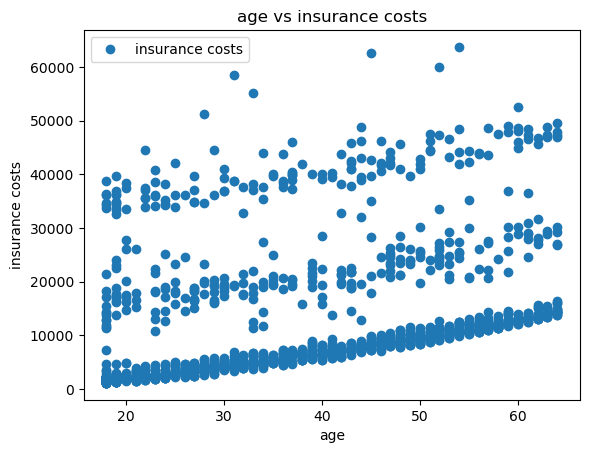

In [10]:
#Data prep for regression analysis#creating a scatterplot of age and insurance costs
df.plot(x = 'age', y='insurance costs',style='o')
plt.title('age vs insurance costs')
plt.xlabel('age')
plt.ylabel('insurance costs')
plt.show()

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['age'].values.reshape(-1,1)
y = df['insurance costs'].values.reshape(-1,1)

In [12]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [13]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [14]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# Regression analysis
#Creating a regression object
regression = LinearRegression() # # This is the regression object, which will be fit onto the training set


In [16]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

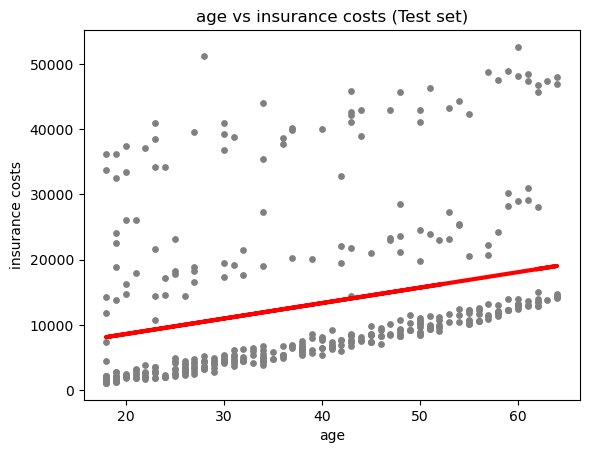

In [18]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('age vs insurance costs (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('insurance costs')
plot_test.show()

In [19]:
#Comments
# The plot confirms my hypothesis that older individuals tend to have higher insuraance costs compared to younger individuals as data points around the older age is small.

In [20]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [21]:
print('Slope' , regression.coef_)
print('Mean squared errors:', rmse)
print('R2 score:', r2)

Slope [[236.87730363]]
Mean squared errors: 141816780.40039897
R2 score: 0.1106963310942739


In [22]:
#comments
#A positive slope value indicates a positive relationship between age and insurance costs;as age increases, insurance costs increases at a degree of 236.877

#MSE of 14,181 is too large to predict the insuarance costs in thousands as the regression line is farther away from the data not making it a good fit to predict charges. Therefore, it is safe to say that regression may not be the best model to represent this data and cannot accurately predict the influence of age on insurance costs.

# An R2 value of 0.11 indicates that Since 11 percent out of one hundred isn’t that great, this means that my model, well, isn’t that great of a fit either

In [23]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9724.53000,16200.715762
1,8547.69130,15016.329244
2,45702.02235,15253.206547
3,12950.07120,18332.611494
4,9644.25250,15963.838458
5,4500.33925,11936.924296
6,2198.18985,8146.887438
7,11436.73815,15963.838458
8,7537.16390,12884.433511
9,5425.02335,11226.292385


In [24]:
#Comments

#The model's performance on the test set:

#The model's predicted values differ significantly from the actual values. This discrepancy suggests that the model did not perform well on the test set. The predicted values are notably higher than the actual values, indicating a considerable deviation. The model seems to struggle in accurately estimating insurance costs based on age.

#Reflections on possible data bias:

#Data bias can significantly impact the model's performance. This data could be limited data by not generalizing well to new or diverse samples. In this case, if the training lacks diversity in terms of demographic, geographic, or other factors influencing insurance costs, the model may not capture the complexity and diversity of real-world scenarios, leading to biased predictions. Addressing bias in the dataset by collecting more diverse and representative data could improve the model's performance and fairness in predictions.

In [25]:
#Compare how the regression fits the training set
y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope' , regression.coef_)
print('Mean squared errors:', rmse)
print('R2 score:', r2)

Slope [[236.87730363]]
Mean squared errors: 129980518.9714462
R2 score: 0.07806233269288265


In [28]:
# R2 on the training data set is lower 0.007 than that of the test set 0.11 meaning it fits better on the taining data set making my model useful when predicting things.